In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np 
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

## In 2D

In [73]:
#Load threshold data
M = 30
N = 10000
d = 2
k = 4

#CLUCB parameter......
alpha_clucb = 0.01

alg = 'conslinucb'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_clucb = a['regret']
arm_pulls_clucb = a['arm_pulls']
update_pol_clucb = a['update_pol']
expt_rewards_clucb = a['reward']
expt_rewards_baseline_clucb = a['reward_baseline']
expt_regret_clucb = a['expt_regret']

alg = 'rarelyswitching'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_rs = a['regret']
arm_pulls_rs = a['arm_pulls']
update_pol_rs = a['update_pol']
expt_rewards_rs = a['reward']
expt_rewards_baseline_rs = a['reward_baseline']
expt_regret_rs = a['expt_regret']

alg = 'threshold'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_thr = a['regret']
arm_pulls_thr = a['arm_pulls']
update_pol_thr = a['update_pol']
expt_rewards_thr = a['reward']
expt_rewards_baseline_thr = a['reward_baseline']
expt_regret_thr = a['expt_regret']

alg = 'linucb'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_ucb = a['regret']
arm_pulls_ucb = a['arm_pulls']
expt_rewards_ucb = a['reward']
expt_rewards_baseline_ucb = a['reward_baseline']
expt_regret_ucb = a['expt_regret']

alg = 'greedy'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_gre = a['regret']
arm_pulls_gre = a['arm_pulls']
expt_rewards_gre = a['reward']
expt_rewards_baseline_gre = a['reward_baseline']
expt_regret_gre = a['expt_regret']

alg = 'thresholdcons'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_thrcons = a['regret']
arm_pulls_thrcons = a['arm_pulls']
update_pol_thrcons = a['update_pol']
expt_rewards_thrcons = a['reward']
expt_rewards_baseline_thrcons = a['reward_baseline']
expt_regret_thrcons = a['expt_regret']

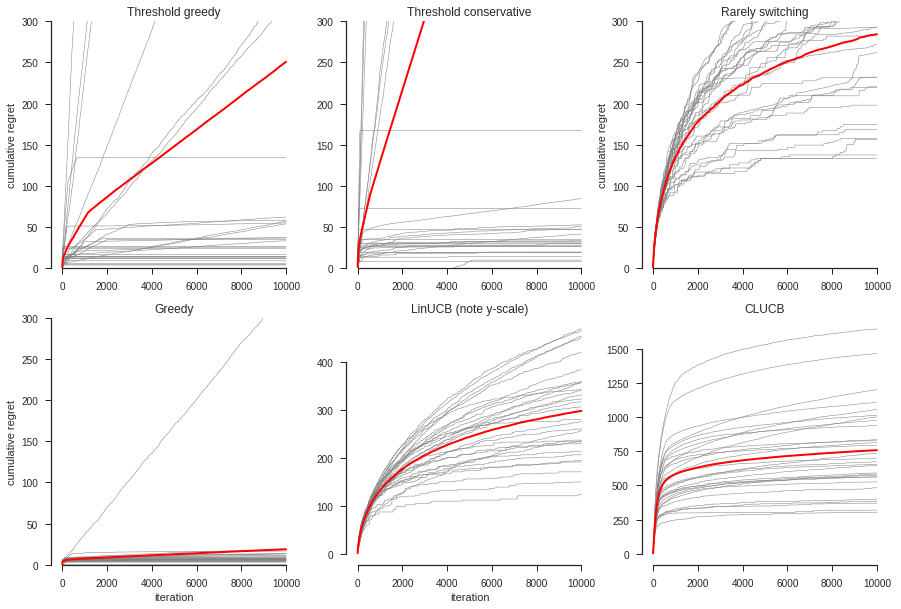

In [61]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

axes[0,0].plot(smooth(np.cumsum(regret_thr, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[0,0].plot(np.mean(np.cumsum(regret_thr, axis = 1), axis=0), color='red', linewidth = 2)
axes[0,0].set_ylabel('cumulative regret')
axes[0,0].set_ylim([0, 300])
axes[0,0].set_title('Threshold greedy')

axes[0,1].plot(smooth(np.cumsum(regret_thrcons, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[0,1].plot(np.mean(np.cumsum(regret_thrcons, axis = 1), axis=0), color='red', linewidth = 2)
axes[0,1].set_title('Threshold conservative')
axes[0,1].set_ylim([0, 300])

axes[1,0].plot(smooth(np.cumsum(regret_gre, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[1,0].plot(np.mean(np.cumsum(regret_gre, axis = 1), axis=0), color='red', linewidth = 2)
axes[1,0].set_xlabel('iteration')
axes[1,0].set_ylabel('cumulative regret')
axes[1,0].set_title('Greedy')
axes[1,0].set_ylim([0, 300])

axes[1,1].plot(smooth(np.cumsum(regret_ucb, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[1,1].plot(np.mean(np.cumsum(regret_ucb, axis = 1), axis=0), color='red', linewidth = 2)
axes[1,1].set_xlabel('iteration')
axes[1,1].set_title('LinUCB (note y-scale)')

axes[0,2].plot(smooth(np.cumsum(regret_rs, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[0,2].plot(np.mean(np.cumsum(regret_rs, axis = 1), axis=0), color='red', linewidth = 2)
axes[0,2].set_ylabel('cumulative regret')
axes[0,2].set_ylim([0, 300])
axes[0,2].set_title('Rarely switching')

axes[1,2].plot(smooth(np.cumsum(regret_clucb, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[1,2].plot(np.mean(np.cumsum(regret_clucb, axis = 1), axis=0), color='red', linewidth = 2)
axes[1,2].set_title('CLUCB')
#axes[2,1].set_ylim([0, 300])

sns.despine(trim = True)
#plt.savefig('./figs/compare_all_methods_traces.pdf')

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/opt/anaconda/anaconda2/env

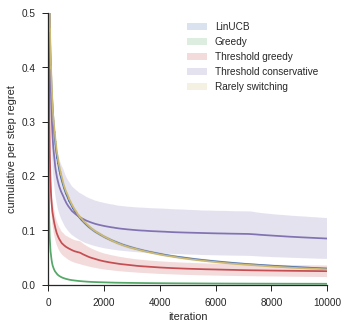

In [62]:
#Plot all on same axis
fig, axes = plt.subplots(1,1,figsize=(5,5))
sns.tsplot(smooth(np.divide(np.cumsum(regret_ucb, axis = 1), np.arange(N)), box_pts = 1), color='C0')
sns.tsplot(smooth(np.divide(np.cumsum(regret_gre, axis = 1), np.arange(N)), box_pts = 1), color='C1')
sns.tsplot(smooth(np.divide(np.cumsum(regret_thr, axis = 1), np.arange(N)), box_pts = 1), color='C2')
sns.tsplot(smooth(np.divide(np.cumsum(regret_thrcons, axis = 1), np.arange(N)), box_pts = 1), color='C3')
sns.tsplot(smooth(np.divide(np.cumsum(regret_rs, axis = 1), np.arange(N)), box_pts = 1), color='C4')
#sns.tsplot(smooth(np.divide(np.cumsum(regret_clucb, axis = 1), np.arange(N)), box_pts = 1), color='C5')
axes.set_ylim([0, 0.5])
axes.set_xlim([0, 10000])
axes.set_xlabel('iteration')
axes.set_ylabel('cumulative per step regret')
axes.legend(['LinUCB', 'Greedy', 'Threshold greedy', 'Threshold conservative', 'Rarely switching', 'CLUCB'])
axes.legend(['LinUCB', 'Greedy', 'Threshold greedy', 'Threshold conservative', 'Rarely switching'])
sns.despine(trim = True)
#plt.savefig('./figs/compare_methods_means.pdf')

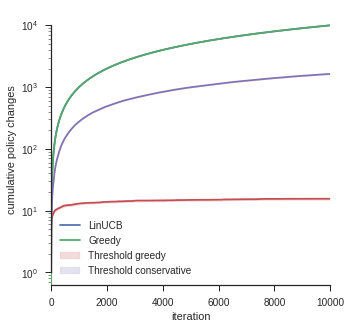

In [134]:
#Plot number of policy changes. By definition both greedy and LinUCB are linear
fig, axes = plt.subplots(1,1,figsize=(5,5))
axes.plot(np.arange(10000))
axes.plot(np.arange(10000))
sns.tsplot(np.cumsum(update_pol_thr, axis = 1), color = 'C2')
sns.tsplot(np.cumsum(update_pol_thrcons, axis = 1), color = 'C3')
#axes.set_ylim([0, 10000])
axes.set_xlim([0, 10000])
axes.set_xlabel('iteration')
axes.set_ylabel('cumulative policy changes')
axes.set_yscale('log')
axes.legend(['LinUCB', 'Greedy', 'Threshold greedy', 'Threshold conservative'])
sns.despine(trim = True)
#plt.savefig('./figs/compare_methods_pol_changes_means.pdf')

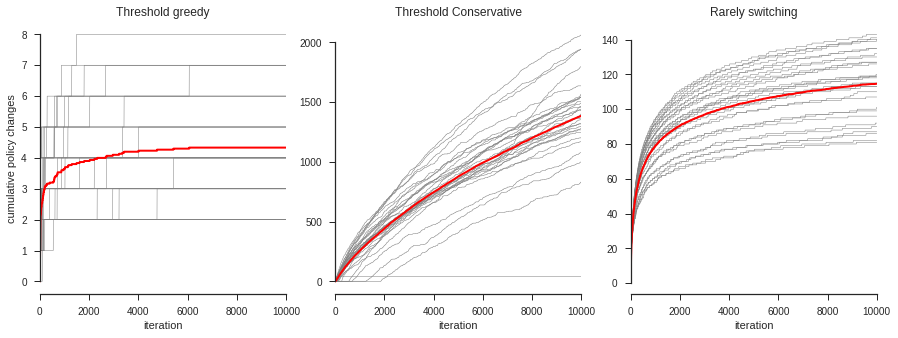

In [63]:
#Plot number of policy changes. By definition both greedy and LinUCB are linear
fig, axes = plt.subplots(1,3,figsize=(15,5))
axes[0].plot(np.cumsum(update_pol_thr, axis = 1).T, color = 'grey', linewidth = 0.5)
axes[1].plot(np.cumsum(update_pol_thrcons, axis = 1).T, color = 'grey', linewidth = 0.5)
axes[2].plot(np.cumsum(update_pol_rs, axis = 1).T, color = 'grey', linewidth = 0.5)
axes[0].plot(np.mean(np.cumsum(update_pol_thr, axis = 1), axis = 0), color = 'red', linewidth = 2)
axes[1].plot(np.mean(np.cumsum(update_pol_thrcons, axis = 1), axis = 0), color = 'red', linewidth = 2)
axes[2].plot(np.mean(np.cumsum(update_pol_rs, axis = 1), axis = 0), color = 'red', linewidth = 2)
axes[0].set_xlim([0, 10000])
axes[1].set_xlim([0, 10000])
axes[2].set_xlim([0, 10000])
axes[0].set_xlabel('iteration')
axes[1].set_xlabel('iteration')
axes[2].set_xlabel('iteration')
axes[0].set_ylabel('cumulative policy changes')
axes[0].set_title('Threshold greedy')
axes[1].set_title('Threshold Conservative')
axes[2].set_title('Rarely switching')
sns.despine(trim = True)
#plt.savefig('./figs/compare_methods_pol_changes_traces.pdf')

In [ ]:
#Also plot the 'mistake rate' of the different methods
#expt_regret_clucb = a['expt_regret']


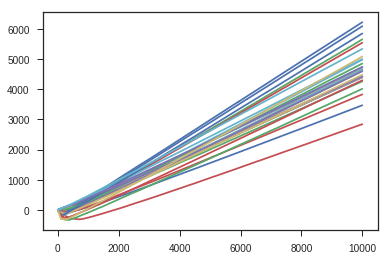

In [41]:
#And the baseline performance violations........

#expt_rewards_clucb = a['reward']
#expt_rewards_baseline_clucb = a['reward_baseline']

cum_expt_rewards_clucb = np.cumsum(expt_rewards_clucb, axis = 1)
cum_expt_rewards_baseline_clucb = np.cumsum(expt_rewards_baseline_clucb, axis = 1)

#plt.plot(cum_expt_rewards_clucb.T)
#cum_expt_rewards_clucb.shape
plt.plot(cum_expt_rewards_clucb.T - (1-alpha_clucb)*cum_expt_rewards_baseline_clucb.T);

In [93]:
#And the baseline performance violations........
cum_expt_rewards_rs = np.cumsum(expt_rewards_rs, axis = 1)
cum_expt_rewards_baseline_rs = np.cumsum(expt_rewards_baseline_rs, axis = 1)
cum_expt_rewards_ucb = np.cumsum(expt_rewards_ucb, axis = 1)
cum_expt_rewards_baseline_ucb = np.cumsum(expt_rewards_baseline_ucb, axis = 1)
cum_expt_rewards_thr = np.cumsum(expt_rewards_thr, axis = 1)
cum_expt_rewards_baseline_thr = np.cumsum(expt_rewards_baseline_thr, axis = 1)
cum_expt_rewards_thrcons = np.cumsum(expt_rewards_thrcons, axis = 1)
cum_expt_rewards_baseline_thrcons = np.cumsum(expt_rewards_baseline_thrcons, axis = 1)
cum_expt_rewards_gre = np.cumsum(expt_rewards_gre, axis = 1)
cum_expt_rewards_baseline_gre = np.cumsum(expt_rewards_baseline_gre, axis = 1)
cum_expt_rewards_clucb = np.cumsum(expt_rewards_clucb, axis = 1)
cum_expt_rewards_baseline_clucb = np.cumsum(expt_rewards_baseline_clucb, axis = 1)

constraint_violation_clucb = np.mean((cum_expt_rewards_clucb.T - (1-alpha_clucb)*cum_expt_rewards_baseline_clucb.T)<0,0)
constraint_violation_gre = np.mean((cum_expt_rewards_gre.T - (1-alpha_clucb)*cum_expt_rewards_baseline_gre.T)<0,0)
constraint_violation_ucb = np.mean((cum_expt_rewards_ucb.T - (1-alpha_clucb)*cum_expt_rewards_baseline_ucb.T)<0,0)
constraint_violation_rs = np.mean((cum_expt_rewards_rs.T - (1-alpha_clucb)*cum_expt_rewards_baseline_rs.T)<0,0)
constraint_violation_thr = np.mean((cum_expt_rewards_thr.T - (1-alpha_clucb)*cum_expt_rewards_baseline_thr.T)<0,0)
constraint_violation_thrcons = np.mean((cum_expt_rewards_thrcons.T - (1-alpha_clucb)*cum_expt_rewards_baseline_thrcons.T)<0,0)

all_method_constraints = 100*np.stack((constraint_violation_ucb,
                                       constraint_violation_gre,
                                       constraint_violation_thr,
                                       constraint_violation_thrcons,
                                       constraint_violation_rs,
                                       constraint_violation_clucb))

df_constraints = pd.DataFrame(data = all_method_constraints.T, columns = ['LinUCB', 'Greedy', 'RS-greedy', 'RS-conservative', 'RS-LinUCB', 'CLUCB'], index = range(M))

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


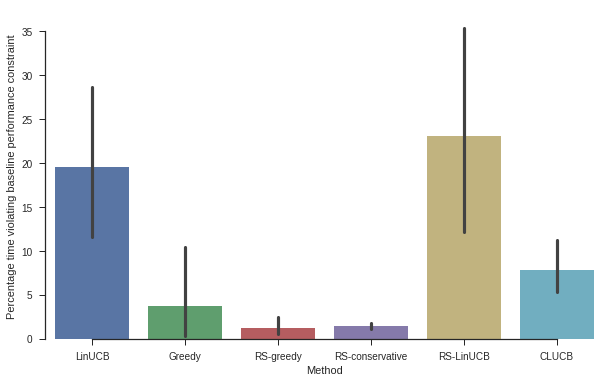

In [94]:
sns.barplot(data = df_constraints)
plt.xlabel("Method")
plt.ylabel("Percentage time violating baseline performance constraint")
sns.despine(trim = True)

## In 5D

In [57]:
#Redo all of the above......

In [74]:
#Load threshold data
M = 30
N = 10000
d = 5
k = 4

#CLUCB parameter......
alpha_clucb = 0.01

alg = 'conslinucb'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_clucb = a['regret']
arm_pulls_clucb = a['arm_pulls']
update_pol_clucb = a['update_pol']
expt_rewards_clucb = a['reward']
expt_rewards_baseline_clucb = a['reward_baseline']
expt_regret_clucb = a['expt_regret']

alg = 'rarelyswitching'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_rs = a['regret']
arm_pulls_rs = a['arm_pulls']
update_pol_rs = a['update_pol']
expt_rewards_rs = a['reward']
expt_rewards_baseline_rs = a['reward_baseline']
expt_regret_rs = a['expt_regret']

alg = 'threshold'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_thr = a['regret']
arm_pulls_thr = a['arm_pulls']
update_pol_thr = a['update_pol']
expt_rewards_thr = a['reward']
expt_rewards_baseline_thr = a['reward_baseline']
expt_regret_thr = a['expt_regret']

alg = 'linucb'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_ucb = a['regret']
arm_pulls_ucb = a['arm_pulls']
expt_rewards_ucb = a['reward']
expt_rewards_baseline_ucb = a['reward_baseline']
expt_regret_ucb = a['expt_regret']

alg = 'greedy'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_gre = a['regret']
arm_pulls_gre = a['arm_pulls']
expt_rewards_gre = a['reward']
expt_rewards_baseline_gre = a['reward_baseline']
expt_regret_gre = a['expt_regret']

alg = 'thresholdcons'
fn_in = './runs/bandit_%s_M_%d_N_%d_with_d_%d_k_%d.npz'%(alg, M, N, d, k)
a = np.load(fn_in)
regret_thrcons = a['regret']
arm_pulls_thrcons = a['arm_pulls']
update_pol_thrcons = a['update_pol']
expt_rewards_thrcons = a['reward']
expt_rewards_baseline_thrcons = a['reward_baseline']
expt_regret_thrcons = a['expt_regret']

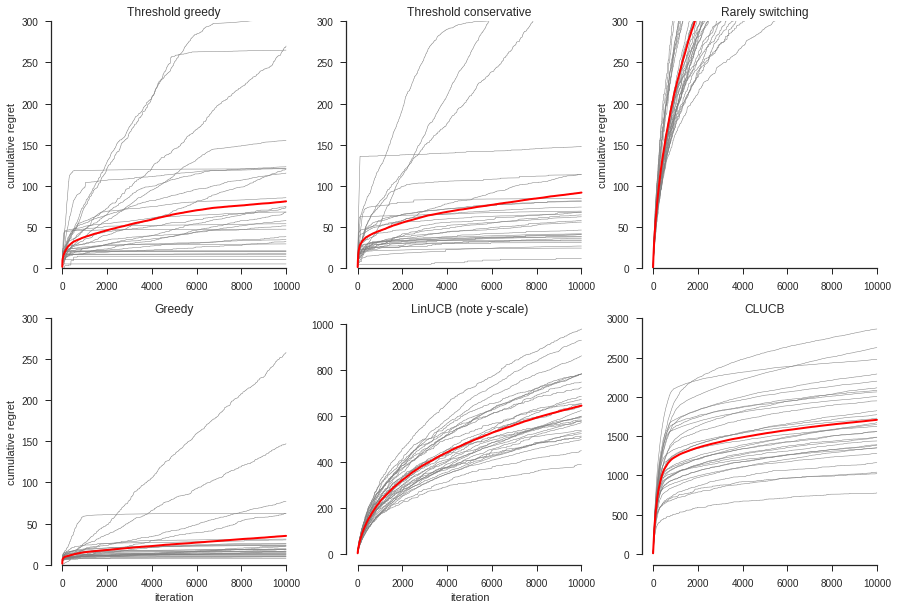

In [67]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

axes[0,0].plot(smooth(np.cumsum(regret_thr, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[0,0].plot(np.mean(np.cumsum(regret_thr, axis = 1), axis=0), color='red', linewidth = 2)
axes[0,0].set_ylabel('cumulative regret')
axes[0,0].set_ylim([0, 300])
axes[0,0].set_title('Threshold greedy')

axes[0,1].plot(smooth(np.cumsum(regret_thrcons, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[0,1].plot(np.mean(np.cumsum(regret_thrcons, axis = 1), axis=0), color='red', linewidth = 2)
axes[0,1].set_title('Threshold conservative')
axes[0,1].set_ylim([0, 300])

axes[1,0].plot(smooth(np.cumsum(regret_gre, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[1,0].plot(np.mean(np.cumsum(regret_gre, axis = 1), axis=0), color='red', linewidth = 2)
axes[1,0].set_xlabel('iteration')
axes[1,0].set_ylabel('cumulative regret')
axes[1,0].set_title('Greedy')
axes[1,0].set_ylim([0, 300])

axes[1,1].plot(smooth(np.cumsum(regret_ucb, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[1,1].plot(np.mean(np.cumsum(regret_ucb, axis = 1), axis=0), color='red', linewidth = 2)
axes[1,1].set_xlabel('iteration')
axes[1,1].set_title('LinUCB (note y-scale)')

axes[0,2].plot(smooth(np.cumsum(regret_rs, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[0,2].plot(np.mean(np.cumsum(regret_rs, axis = 1), axis=0), color='red', linewidth = 2)
axes[0,2].set_ylabel('cumulative regret')
axes[0,2].set_ylim([0, 300])
axes[0,2].set_title('Rarely switching')

axes[1,2].plot(smooth(np.cumsum(regret_clucb, axis = 1), box_pts = 1).T[:,0:30], color='grey', linewidth = 0.5)
axes[1,2].plot(np.mean(np.cumsum(regret_clucb, axis = 1), axis=0), color='red', linewidth = 2)
axes[1,2].set_title('CLUCB')
#axes[2,1].set_ylim([0, 300])

sns.despine(trim = True)
#plt.savefig('./figs/compare_all_methods_traces.pdf')

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/opt/anaconda/anaconda2/env

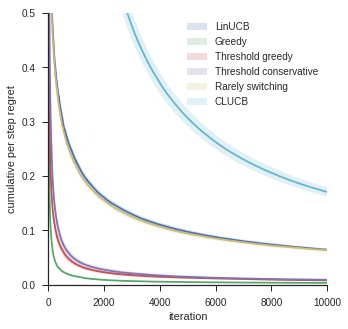

In [69]:
#Plot all on same axis
fig, axes = plt.subplots(1,1,figsize=(5,5))
sns.tsplot(smooth(np.divide(np.cumsum(regret_ucb, axis = 1), np.arange(N)), box_pts = 1), color='C0')
sns.tsplot(smooth(np.divide(np.cumsum(regret_gre, axis = 1), np.arange(N)), box_pts = 1), color='C1')
sns.tsplot(smooth(np.divide(np.cumsum(regret_thr, axis = 1), np.arange(N)), box_pts = 1), color='C2')
sns.tsplot(smooth(np.divide(np.cumsum(regret_thrcons, axis = 1), np.arange(N)), box_pts = 1), color='C3')
sns.tsplot(smooth(np.divide(np.cumsum(regret_rs, axis = 1), np.arange(N)), box_pts = 1), color='C4')
sns.tsplot(smooth(np.divide(np.cumsum(regret_clucb, axis = 1), np.arange(N)), box_pts = 1), color='C5')
axes.set_ylim([0, 0.5])
axes.set_xlim([0, 10000])
axes.set_xlabel('iteration')
axes.set_ylabel('cumulative per step regret')
axes.legend(['LinUCB', 'Greedy', 'Threshold greedy', 'Threshold conservative', 'Rarely switching', 'CLUCB'])
#axes.legend(['LinUCB', 'Greedy', 'Threshold greedy', 'Threshold conservative', 'Rarely switching'])
sns.despine(trim = True)
#plt.savefig('./figs/compare_methods_means.pdf')

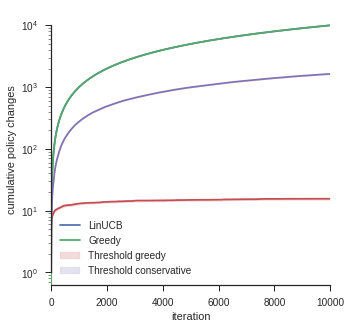

In [134]:
#Plot number of policy changes. By definition both greedy and LinUCB are linear
fig, axes = plt.subplots(1,1,figsize=(5,5))
axes.plot(np.arange(10000))
axes.plot(np.arange(10000))
sns.tsplot(np.cumsum(update_pol_thr, axis = 1), color = 'C2')
sns.tsplot(np.cumsum(update_pol_thrcons, axis = 1), color = 'C3')
#axes.set_ylim([0, 10000])
axes.set_xlim([0, 10000])
axes.set_xlabel('iteration')
axes.set_ylabel('cumulative policy changes')
axes.set_yscale('log')
axes.legend(['LinUCB', 'Greedy', 'Threshold greedy', 'Threshold conservative'])
sns.despine(trim = True)
#plt.savefig('./figs/compare_methods_pol_changes_means.pdf')

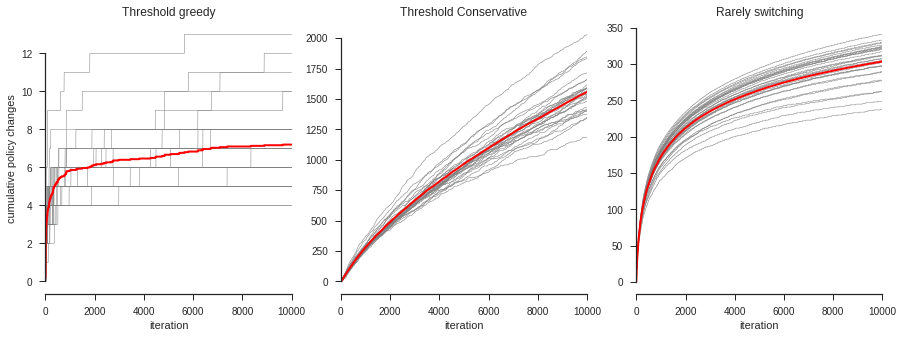

In [70]:
#Plot number of policy changes. By definition both greedy and LinUCB are linear
fig, axes = plt.subplots(1,3,figsize=(15,5))
axes[0].plot(np.cumsum(update_pol_thr, axis = 1).T, color = 'grey', linewidth = 0.5)
axes[1].plot(np.cumsum(update_pol_thrcons, axis = 1).T, color = 'grey', linewidth = 0.5)
axes[2].plot(np.cumsum(update_pol_rs, axis = 1).T, color = 'grey', linewidth = 0.5)
axes[0].plot(np.mean(np.cumsum(update_pol_thr, axis = 1), axis = 0), color = 'red', linewidth = 2)
axes[1].plot(np.mean(np.cumsum(update_pol_thrcons, axis = 1), axis = 0), color = 'red', linewidth = 2)
axes[2].plot(np.mean(np.cumsum(update_pol_rs, axis = 1), axis = 0), color = 'red', linewidth = 2)
axes[0].set_xlim([0, 10000])
axes[1].set_xlim([0, 10000])
axes[2].set_xlim([0, 10000])
axes[0].set_xlabel('iteration')
axes[1].set_xlabel('iteration')
axes[2].set_xlabel('iteration')
axes[0].set_ylabel('cumulative policy changes')
axes[0].set_title('Threshold greedy')
axes[1].set_title('Threshold Conservative')
axes[2].set_title('Rarely switching')
sns.despine(trim = True)
#plt.savefig('./figs/compare_methods_pol_changes_traces.pdf')

In [ ]:
#Also plot the 'mistake rate' of the different methods
#expt_regret_clucb = a['expt_regret']


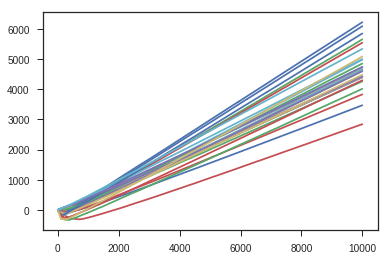

In [41]:
#And the baseline performance violations........

#expt_rewards_clucb = a['reward']
#expt_rewards_baseline_clucb = a['reward_baseline']

cum_expt_rewards_clucb = np.cumsum(expt_rewards_clucb, axis = 1)
cum_expt_rewards_baseline_clucb = np.cumsum(expt_rewards_baseline_clucb, axis = 1)

#plt.plot(cum_expt_rewards_clucb.T)
#cum_expt_rewards_clucb.shape
plt.plot(cum_expt_rewards_clucb.T - (1-alpha_clucb)*cum_expt_rewards_baseline_clucb.T);

In [95]:
#And the baseline performance violations........
cum_expt_rewards_rs = np.cumsum(expt_rewards_rs, axis = 1)
cum_expt_rewards_baseline_rs = np.cumsum(expt_rewards_baseline_rs, axis = 1)
cum_expt_rewards_ucb = np.cumsum(expt_rewards_ucb, axis = 1)
cum_expt_rewards_baseline_ucb = np.cumsum(expt_rewards_baseline_ucb, axis = 1)
cum_expt_rewards_thr = np.cumsum(expt_rewards_thr, axis = 1)
cum_expt_rewards_baseline_thr = np.cumsum(expt_rewards_baseline_thr, axis = 1)
cum_expt_rewards_thrcons = np.cumsum(expt_rewards_thrcons, axis = 1)
cum_expt_rewards_baseline_thrcons = np.cumsum(expt_rewards_baseline_thrcons, axis = 1)
cum_expt_rewards_gre = np.cumsum(expt_rewards_gre, axis = 1)
cum_expt_rewards_baseline_gre = np.cumsum(expt_rewards_baseline_gre, axis = 1)
cum_expt_rewards_clucb = np.cumsum(expt_rewards_clucb, axis = 1)
cum_expt_rewards_baseline_clucb = np.cumsum(expt_rewards_baseline_clucb, axis = 1)

constraint_violation_clucb = np.mean((cum_expt_rewards_clucb.T - (1-alpha_clucb)*cum_expt_rewards_baseline_clucb.T)<0,0)
constraint_violation_gre = np.mean((cum_expt_rewards_gre.T - (1-alpha_clucb)*cum_expt_rewards_baseline_gre.T)<0,0)
constraint_violation_ucb = np.mean((cum_expt_rewards_ucb.T - (1-alpha_clucb)*cum_expt_rewards_baseline_ucb.T)<0,0)
constraint_violation_rs = np.mean((cum_expt_rewards_rs.T - (1-alpha_clucb)*cum_expt_rewards_baseline_rs.T)<0,0)
constraint_violation_thr = np.mean((cum_expt_rewards_thr.T - (1-alpha_clucb)*cum_expt_rewards_baseline_thr.T)<0,0)
constraint_violation_thrcons = np.mean((cum_expt_rewards_thrcons.T - (1-alpha_clucb)*cum_expt_rewards_baseline_thrcons.T)<0,0)

all_method_constraints = 100*np.stack((constraint_violation_ucb,
                                       constraint_violation_gre,
                                       constraint_violation_thr,
                                       constraint_violation_thrcons,
                                       constraint_violation_rs,
                                       constraint_violation_clucb))

df_constraints = pd.DataFrame(data = all_method_constraints.T, columns = ['LinUCB', 'Greedy', 'RS-greedy', 'RS-conservative', 'RS-LinUCB', 'CLUCB'], index = range(M))

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


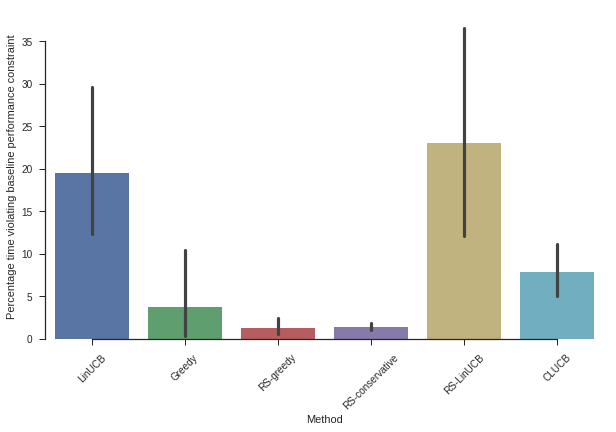

In [96]:
sns.barplot(data = df_constraints)
plt.xlabel("Method")
plt.ylabel("Percentage time violating baseline performance constraint")
plt.xticks(rotation=45)
sns.despine(trim = True)

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/opt/anaconda/anaconda2/env

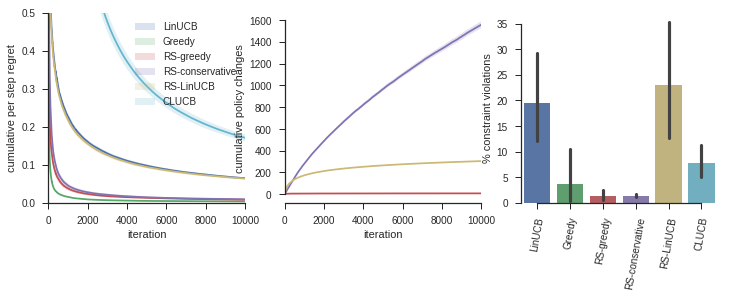

In [98]:
#Put all in one figure....
fig, axes = plt.subplots(1,3,figsize=(12,3.5))
sns.tsplot(smooth(np.divide(np.cumsum(regret_ucb, axis = 1), np.arange(N)), box_pts = 1), color='C0', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_gre, axis = 1), np.arange(N)), box_pts = 1), color='C1', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_thr, axis = 1), np.arange(N)), box_pts = 1), color='C2', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_thrcons, axis = 1), np.arange(N)), box_pts = 1), color='C3', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_rs, axis = 1), np.arange(N)), box_pts = 1), color='C4', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_clucb, axis = 1), np.arange(N)), box_pts = 1), color='C5', ax = axes[0])
axes[0].set_ylim([0, 0.5])
axes[0].set_xlim([0, 10000])
axes[0].set_xlabel('iteration')
axes[0].set_ylabel('cumulative per step regret')
axes[0].legend(['LinUCB', 'Greedy', 'RS-greedy', 'RS-conservative', 'RS-LinUCB', 'CLUCB'])

sns.tsplot(smooth(np.cumsum(update_pol_thr, axis = 1), box_pts = 1), color='C2', ax = axes[1])
sns.tsplot(smooth(np.cumsum(update_pol_thrcons, axis = 1), box_pts = 1), color='C3', ax = axes[1])
sns.tsplot(smooth(np.cumsum(update_pol_rs, axis = 1), box_pts = 1), color='C4', ax = axes[1])

#axes[1].plot(np.cumsum(update_pol_thr, axis = 1).T, color = 'grey', linewidth = 0.5)
#axes[1].plot(np.cumsum(update_pol_thrcons, axis = 1).T, color = 'grey', linewidth = 0.5)
#axes[1].plot(np.cumsum(update_pol_rs, axis = 1).T, color = 'grey', linewidth = 0.5)
#axes[1].plot(np.mean(np.cumsum(update_pol_thr, axis = 1), axis = 0), color = 'C2', linewidth = 2)
#axes[1].plot(np.mean(np.cumsum(update_pol_thrcons, axis = 1), axis = 0), color = 'C3', linewidth = 2)
#axes[1].plot(np.mean(np.cumsum(update_pol_rs, axis = 1), axis = 0), color = 'C4', linewidth = 2)
axes[1].set_xlim([0, 10000])
axes[1].set_xlabel('iteration')
axes[1].set_ylabel('cumulative policy changes')

sns.barplot(data = df_constraints, ax = axes[2])
axes[2].set_ylabel("% constraint violations")
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=80)

sns.despine(trim = True)
plt.savefig('./figs/compare_methods_all.pdf')

## Checking robustness to delta

For 2D case, for both RS-greedy and RS-conservative, run with a range of delta values....

In [10]:
#Load threshold data
M = 30
N = 10000
d = 4
k = 2

O = 4
del_angle = np.logspace(-4, -1, O)

alg = 'thresholdmaxconsgreedy'

idx = 0
fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d_delta_%f.npz'%(alg, d, k, M, N, del_angle[idx])
a = np.load(fn_in)
regret_mcg0 = a['regret']
arm_pulls_mcg0 = a['arm_pulls']
update_pol_mcg0 = a['update_pol']

idx = 1
fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d_delta_%f.npz'%(alg, d, k, M, N, del_angle[idx])
a = np.load(fn_in)
regret_mcg1 = a['regret']
arm_pulls_mcg1 = a['arm_pulls']
update_pol_mcg1 = a['update_pol']

idx = 2
fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d_delta_%f.npz'%(alg, d, k, M, N, del_angle[idx])
a = np.load(fn_in)
regret_mcg2 = a['regret']
arm_pulls_mcg2 = a['arm_pulls']
update_pol_mcg2 = a['update_pol']

idx = 3
fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d_delta_%f.npz'%(alg, d, k, M, N, del_angle[idx])
a = np.load(fn_in)
regret_mcg3 = a['regret']
arm_pulls_mcg3 = a['arm_pulls']
update_pol_mcg3 = a['update_pol']

alg = 'thresholdmaxcons'

idx = 0
fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d_delta_%f.npz'%(alg, d, k, M, N, del_angle[idx])
a = np.load(fn_in)
regret_mc0 = a['regret']
arm_pulls_mc0 = a['arm_pulls']
update_pol_mc0 = a['update_pol']

idx = 1
fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d_delta_%f.npz'%(alg, d, k, M, N, del_angle[idx])
a = np.load(fn_in)
regret_mc1 = a['regret']
arm_pulls_mc1 = a['arm_pulls']
update_pol_mc1 = a['update_pol']

idx = 2
fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d_delta_%f.npz'%(alg, d, k, M, N, del_angle[idx])
a = np.load(fn_in)
regret_mc2 = a['regret']
arm_pulls_mc2 = a['arm_pulls']
update_pol_mc2 = a['update_pol']

idx = 3
fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d_delta_%f.npz'%(alg, d, k, M, N, del_angle[idx])
a = np.load(fn_in)
regret_mc3 = a['regret']
arm_pulls_mc3 = a['arm_pulls']
update_pol_mc3 = a['update_pol']


/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/ipyke

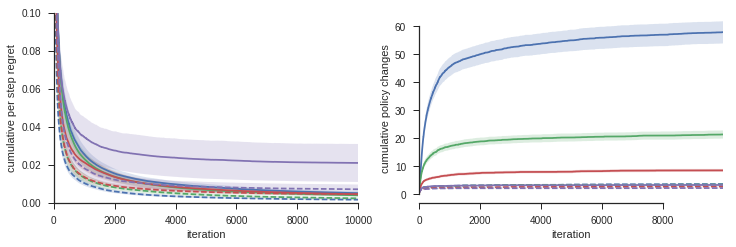

In [16]:
fig, axes = plt.subplots(1,2,figsize=(12,3.5))
sns.tsplot(smooth(np.divide(np.cumsum(regret_mc0, axis = 1), np.arange(N)), box_pts = 1), color='C0', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_mc1, axis = 1), np.arange(N)), box_pts = 1), color='C1', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_mc2, axis = 1), np.arange(N)), box_pts = 1), color='C2', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_mc3, axis = 1), np.arange(N)), box_pts = 1), color='C3', ax = axes[0])

sns.tsplot(smooth(np.divide(np.cumsum(regret_mcg0, axis = 1), np.arange(N)), box_pts = 1), color='C0', linestyle = '--', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_mcg1, axis = 1), np.arange(N)), box_pts = 1), color='C1', linestyle = '--', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_mcg2, axis = 1), np.arange(N)), box_pts = 1), color='C2', linestyle = '--', ax = axes[0])
sns.tsplot(smooth(np.divide(np.cumsum(regret_mcg3, axis = 1), np.arange(N)), box_pts = 1), color='C3', linestyle = '--', ax = axes[0])


sns.tsplot(np.cumsum(update_pol_mc0, axis=1), color = 'C%d'%0, ax = axes[1])
sns.tsplot(np.cumsum(update_pol_mcg0, axis=1), color = 'C%d'%0, ax = axes[1], linestyle='--')
sns.tsplot(np.cumsum(update_pol_mc1, axis=1), color = 'C%d'%1, ax = axes[1])
sns.tsplot(np.cumsum(update_pol_mcg1, axis=1), color = 'C%d'%1, ax = axes[1], linestyle='--')

sns.tsplot(np.cumsum(update_pol_mc2, axis=1), color = 'C%d'%2, ax = axes[1])
sns.tsplot(np.cumsum(update_pol_mcg2, axis=1), color = 'C%d'%2, ax = axes[1], linestyle='--')
sns.tsplot(np.cumsum(update_pol_mc3, axis=1), color = 'C%d'%3, ax = axes[1])
sns.tsplot(np.cumsum(update_pol_mcg3, axis=1), color = 'C%d'%3, ax = axes[1], linestyle='--')

axes[0].set_ylim([0, 0.1])
axes[0].set_xlim([0, 10000])
axes[0].set_xlabel('iteration')
axes[0].set_ylabel('cumulative per step regret')

#axes[1].set_ylim([0, 0.2])
#axes[1].set_xlim([0, 10000])
axes[1].set_xlabel('iteration')
axes[1].set_ylabel('cumulative policy changes')

#axes[0].legend(['LinUCB', 'Greedy', 'RS-greedy', 'RS-conservative', 'RS-LinUCB', 'CLUCB'])

#sns.tsplot(smooth(np.cumsum(update_pol_thr, axis = 1), box_pts = 1), color='C2', ax = axes[1])
#sns.tsplot(smooth(np.cumsum(update_pol_thrcons, axis = 1), box_pts = 1), color='C3', ax = axes[1])
#sns.tsplot(smooth(np.cumsum(update_pol_rs, axis = 1), box_pts = 1), color='C4', ax = axes[1])

sns.despine(trim = True)
plt.savefig('./figs/synthetic_delta_robustness.pdf')